# Q1 (30 Points)

<font size=4>
Author: Reza Amini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [6]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

<div>
	<font size=3>
        <hr/>
            In this part of the question, we want to implement functions and draw diagrams and discuss about convexity of functions
           <hr/>
    </font>
</div>

## Functions

a)
$f_1(x) = \frac{x^2 cos(\frac{x}{10}) - x}{100} \quad $ where $\quad x \in [80, 110]$
<br/>
b)
$f_2(x) = \log (\sqrt{sin \frac{x}{20}}) \quad $ where $\quad x \in [1, 60]$
<br/>
c)
$f_3(x) = \log (\cos(x) + \frac{45}{x}) \quad $ where $\quad x \in [1, 45]$

<div>
    <font size=3>
In first step, implement functions.
     </font>
</div>

In [7]:
def f_1(x):
    return (x ** 2 * np.cos(x / 10) - x) / 100

In [8]:
def f_2(x):
    return np.log((np.sin(x / 20)) ** 0.5)

In [9]:
def f_3(x):
    return np.log(np.cos(x) + (45 / x))

<div>
    <font size=3>
    Now implement a function to plot the mathematical functions
     </font>
</div>

In [10]:
def draw(func, x_range):
    vatorized_function = np.vectorize(func)
    function_plot = vatorized_function(x_range)
    plt.plot(function_plot)
    plt.show()

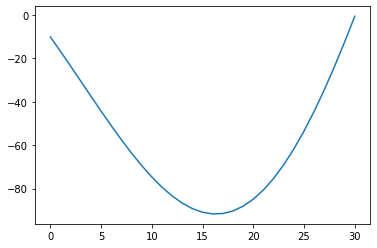

In [11]:
draw(f_1, np.arange(80, 110 + 1))

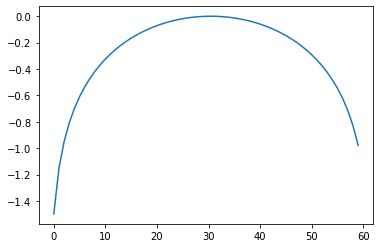

In [12]:
draw(f_2, np.arange(1, 60 + 1))

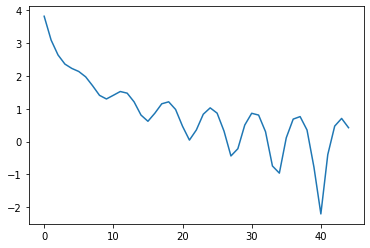

In [13]:
draw(f_3, np.arange(1, 45 + 1))

<div>
    <font size=3>
    Discuss the Convexity of each function according to the diagrams
     </font>
</div>

<font color=red>
    (4 Points) <br/>
In the previous 3 sections we drew diagrams of 3 functions. According to the diagrams, the first function is convex, because the condition of being convex is established, but according to the diagrams of the second and third functions, the condition of convex is not established, and of course the second function is concave.
</font>

<div>
    <font size=3>
what method do you suggest to find the maximum in second function?
     </font>
</div>

<font color=red>
    (2 Points) <br/>
As we said in the previous section, the second function is concave, now if we multiply this function by -1, the function becomes convex in this interval, so it is enough to get the minimum of the function, the symmetry of this value is the maximum of the current function.
</font>

<div>
    <font size=3>
        <hr/>
        <ul>
            In this part, we want to obtain a minimum of one of the above functions with the gradiant descent algorithm
        </ul>  
        <hr/>
    </font>
</div>

## Gradiant descent

<div>
    <font size=3>
    Complete gradiant descent fuction and calculate the minimum of function (a).
     </font>
</div>

In [37]:
def gradiant_descent(func, initial_point: float, learning_rate: float, max_iterations: int):
    from scipy import misc
    step_counter = 0
    x0 = initial_point
    while step_counter < max_iterations:
        x0 = x0 - learning_rate * misc.derivative(func, x0)
        y0 = func(x0)
        step_counter = step_counter + 1
    return y0

In [38]:
gradiant_descent(
    func=f_1, 
    initial_point=np.random.uniform(80, 110), 
    learning_rate=0.05, 
    max_iterations=1000
)

-91.75388208286893

<div>
    <font size=3>
In the last part, we want to investigate the effect of the learning rate hyperparameter on the gradiant descent algorithm with new function     
    </font>
</div>

## Function

$f(x_1, x_2) = 2x_1^2 + 3x_2^2 - 4x_1x_2 - 50x_1 + 6x_2$

In [18]:
def f(x_1, x_2):
    return (2 * x_1 ** 2) + (3 * x_2 ** 2) - (4 * x_1 * x_2) - (50 * x_1) + (6 * x_2)

<div>
    <font size=3>
Implement gradiant descent function for two-dimensional functions, in such a way that it gives sequence of x_1 and x_2 in the output ()
    </font>
</div>

In [19]:
def gradiant_descent(func, initial_point: Tuple, learning_rate: float, threshold: float, max_iterations: int):
    x_1_sequence = [initial_point[0]]
    x_2_sequence = [initial_point[1]]
    step_counter = 0
    x_1 = initial_point[0]
    x_2 = initial_point[1]
    # Threshold: if either the value of x1 or x2 is greater than this value, the algorithm ends
    # implement your function
    ############################################################
    while abs(x_1) <= threshold and abs(x_2) <= threshold and step_counter < max_iterations:
        x_1, x_2 = update_points(f, x_1, x_2, learning_rate)
        x_1_sequence.append(x_1)
        x_2_sequence.append(x_2)
        step_counter += 1
    return x_1_sequence, x_2_sequence
    ############################################################
    
    return x_1_sequence, x_2_sequence

def update_points(func, x_1, x_2, learning_rate):
    eps = 10**-6
    new_x = x_1 - learning_rate * (f(x_1 + eps, x_2) - f(x_1, x_2)) / eps
    new_y = x_2 - learning_rate * (f(x_1, x_2 + eps) - f(x_1, x_2)) / eps    
    return new_x, new_y

In [20]:
def draw_points_sequence(func, x_1_sequence, x_2_sequence):
    X1, X2 = np.meshgrid(np.linspace(-100.0, 100.0, 100), np.linspace(-100.0, 100.0, 100))
    Y = func(X1, X2)
    cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(x_1_sequence, x_2_sequence, s=10, c="y")
    plt.show()

<div>
    <font size=3>
    Run the gradiant descent algorithm for each of the learning rate values and use the above function to draw diagram
    </font>
</div>

In [21]:
initial_point = (-100, 100)
learning_rates = [0.01, 0.05, 0.19, 0.4]
threshold = 100
max_iterations = 1000

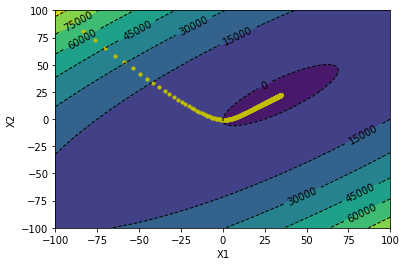

In [23]:
# learning rate 0.01
x_1_sequence, x_2_sequence = gradiant_descent(
    f,
    initial_point,
    learning_rates[0],
    threshold,
    max_iterations
)
draw_points_sequence(f, x_1_sequence, x_2_sequence)

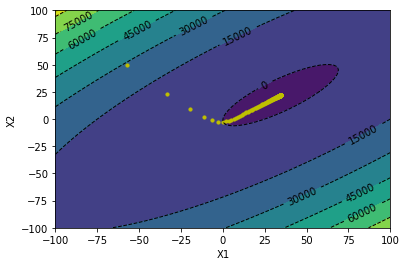

In [24]:
# learning rate 0.05
x_1_sequence, x_2_sequence = gradiant_descent(
    f,
    initial_point,
    learning_rates[1],
    threshold,
    max_iterations
)
draw_points_sequence(f, x_1_sequence, x_2_sequence)

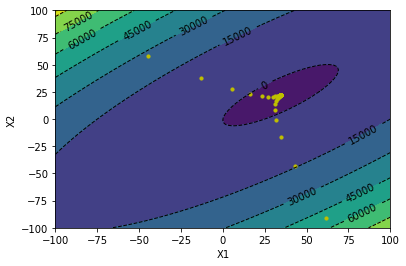

In [28]:
# learning rate 0.19
x_1_sequence, x_2_sequence = gradiant_descent(
    f,
    initial_point,
    learning_rates[2],
    threshold,
    max_iterations
)
draw_points_sequence(f, x_1_sequence, x_2_sequence)

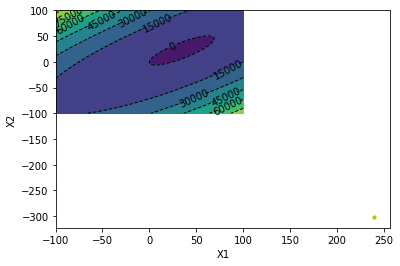

In [30]:
# learning rate 0.4
x_1_sequence, x_2_sequence = gradiant_descent(
    f,
    initial_point,
    learning_rates[3],
    threshold,
    max_iterations
)
draw_points_sequence(f, x_1_sequence, x_2_sequence)

<div>
    <font size=3>
    explain your result comprehensively from the charts, 
    </font>
</div>

<font color=red>
    (3 Points) <br/>
Figure 1:
According to the diagram, it is clear that convergence has occurred, but the number of points is high, which means that with this learning rate, we will be able to solve the problem slowly.
    <br/><br/>
Figure 2:
This graph is the same as the previous one, but with fewer points, which means it converges faster
    <br/><br/>
Figure 3:
Convergence has occurred again in this diagram, but it is much faster than the previous two modes, and also the type of convergence is different from the previous two cases.
    <br/><br/>
Figure 4:
Due to the high rate of learning, convergence has not occurred
</font>